### **IMPORT LIBRARY**

In [275]:
import os, joblib, math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.multioutput import MultiOutputClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression   
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB      
from sklearn.svm import SVC 

from sklearn.model_selection import cross_validate
from sklearn.metrics import ( accuracy_score, precision_score, 
                             recall_score,f1_score, 
                             confusion_matrix, classification_report) 
    
import matplotlib.pyplot as plt
import seaborn as sns

### **PATH CONFIGURATION**

In [276]:
RAW_DATA = 'raw_data.csv'
FINAL_DATA = 'final_data.csv'
SCALER = 'scaler.pkl'

DATA_PATH = '../data/'
MODELS_PATH = '../models/'

SCALER_PATH = DATA_PATH + 'scaler/'
ENCODER_PATH = DATA_PATH + 'encoder/'

os.makedirs(MODELS_PATH, exist_ok=True)
os.makedirs(DATA_PATH, exist_ok=True)
os.makedirs(ENCODER_PATH, exist_ok=True)
os.makedirs(SCALER_PATH, exist_ok=True)

### **EDA PROCESS**

In [277]:
df = pd.read_csv(DATA_PATH + RAW_DATA)
print(df.shape)

(14589, 15)


In [278]:
df.head()

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,1,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,2,Male,18,1.68,47.5,Yes,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,3,Male,18,1.68,47.5,No,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,4,Male,18,1.68,47.5,Yes,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,5,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


In [279]:
df.tail()

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
14584,14585,Male,35,1.88,98.0,No,No,27.73,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Ellipticals, Indoor Rowers,Treadmills, and Row...","Vegetables: (Broccoli, Carrots, Spinach, Lettu...",Follow a regular exercise schedule. Adhere to ...
14585,14586,Male,36,1.89,99.0,No,No,27.71,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Ellipticals, Indoor Rowers,Treadmills, and Row...","Vegetables: (Broccoli, Carrots, Spinach, Lettu...",Follow a regular exercise schedule. Adhere to ...
14586,14587,Male,37,1.90,100.0,No,No,27.70,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Ellipticals, Indoor Rowers,Treadmills, and Row...","Vegetables: (Broccoli, Carrots, Spinach, Lettu...",Follow a regular exercise schedule. Adhere to ...
14587,14588,Male,38,1.91,101.0,No,No,27.69,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Ellipticals, Indoor Rowers,Treadmills, and Row...","Vegetables: (Broccoli, Carrots, Spinach, Lettu...",Follow a regular exercise schedule. Adhere to ...
14588,14589,Male,39,1.92,102.0,No,No,27.67,Overweight,Weight Loss,Cardio Fitness,"Brisk walking, cycling, swimming, running , or...","Ellipticals, Indoor Rowers,Treadmills, and Row...","Vegetables: (Broccoli, Carrots, Spinach, Lettu...",Follow a regular exercise schedule. Adhere to ...


In [280]:
df.columns

Index(['ID', 'Sex', 'Age', 'Height', 'Weight', 'Hypertension', 'Diabetes',
       'BMI', 'Level', 'Fitness Goal', 'Fitness Type', 'Exercises',
       'Equipment', 'Diet', 'Recommendation'],
      dtype='object')

In [281]:
df = df.drop('ID', axis=1)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14589 entries, 0 to 14588
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             14589 non-null  object 
 1   Age             14589 non-null  int64  
 2   Height          14589 non-null  float64
 3   Weight          14589 non-null  float64
 4   Hypertension    14589 non-null  object 
 5   Diabetes        14589 non-null  object 
 6   BMI             14589 non-null  float64
 7   Level           14589 non-null  object 
 8   Fitness Goal    14589 non-null  object 
 9   Fitness Type    14589 non-null  object 
 10  Exercises       14589 non-null  object 
 11  Equipment       14589 non-null  object 
 12  Diet            14589 non-null  object 
 13  Recommendation  14589 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.6+ MB


In [283]:
df.describe()

,Age,Height,Weight,BMI
count,14589.000000,14589.000000,14589.000000,14589.000000
mean,39.554870,1.699851,70.505991,24.417569
std,13.192655,0.098129,20.030635,6.765144
min,18.000000,1.300000,32.000000,9.520000
25%,28.000000,1.640000,55.000000,18.940000
50%,39.000000,1.680000,70.000000,25.250000
75%,51.000000,1.770000,86.000000,29.320000
max,63.000000,2.030000,130.000000,70.000000


In [284]:
df.isnull().sum()

Sex               0
Age               0
Height            0
Weight            0
Hypertension      0
Diabetes          0
BMI               0
Level             0
Fitness Goal      0
Fitness Type      0
Exercises         0
Equipment         0
Diet              0
Recommendation    0
dtype: int64

### **DETECTING AND REMOVE DUPLICATED ROW**

In [285]:
total_data = len(df)
total_duplicates = df.duplicated().sum()
print(f"\Before Dropping Duplicates:")
print(f"Total Data Row      :{total_data}")
print(f"Total Duplicate Row :{total_duplicates}")

df = df.drop_duplicates().reset_index(drop=True)

total_data_new = len(df)
total_duplicates_new = df.duplicated().sum()
print(f"\nAfter Dropping Duplicates:")
print(f"Total Data Row      :{total_data_new}")
print(f"Total Duplicate Row :{total_duplicates_new}")

\Before Dropping Duplicates:
Total Data Row      :14589
Total Duplicate Row :2437

After Dropping Duplicates:
Total Data Row      :12152
Total Duplicate Row :0


<>:3: SyntaxWarning: invalid escape sequence '\B'
<>:3: SyntaxWarning: invalid escape sequence '\B'
C:\Users\crisv\AppData\Local\Temp\ipykernel_7456\3719618428.py:3: SyntaxWarning: invalid escape sequence '\B'
  print(f"\Before Dropping Duplicates:")


### **DETECTING AND REMOVE OUTLIER**

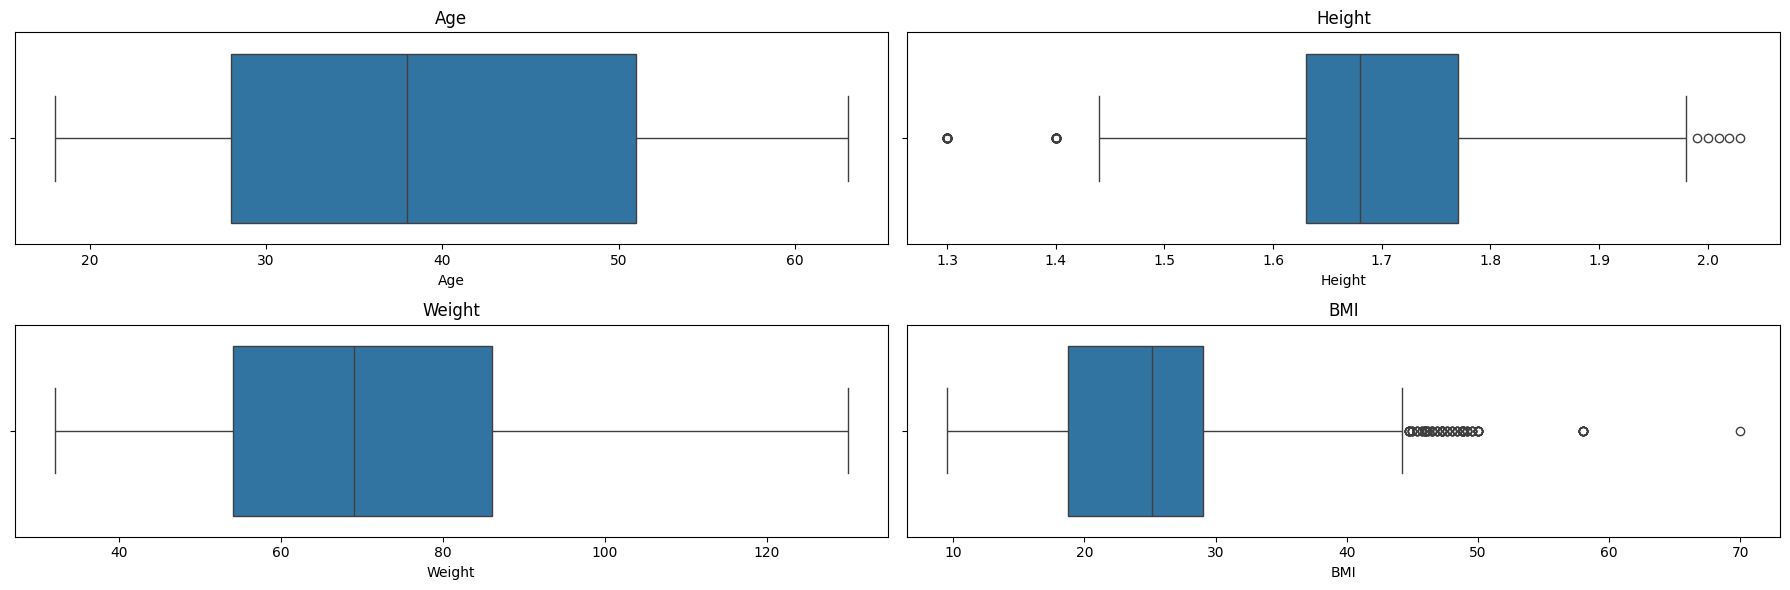

In [286]:
columns = ['Age', 'Height', 'Weight', 'BMI']
plots_per_row = 2 
n_rows = math.ceil(len(columns) / plots_per_row) 
n_cols = plots_per_row

plt.figure(figsize=(18, 3 * n_rows))
for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1) 
    sns.boxplot(x=df[col]) 
    plt.title(col, fontsize=12)

plt.tight_layout() 
plt.show()

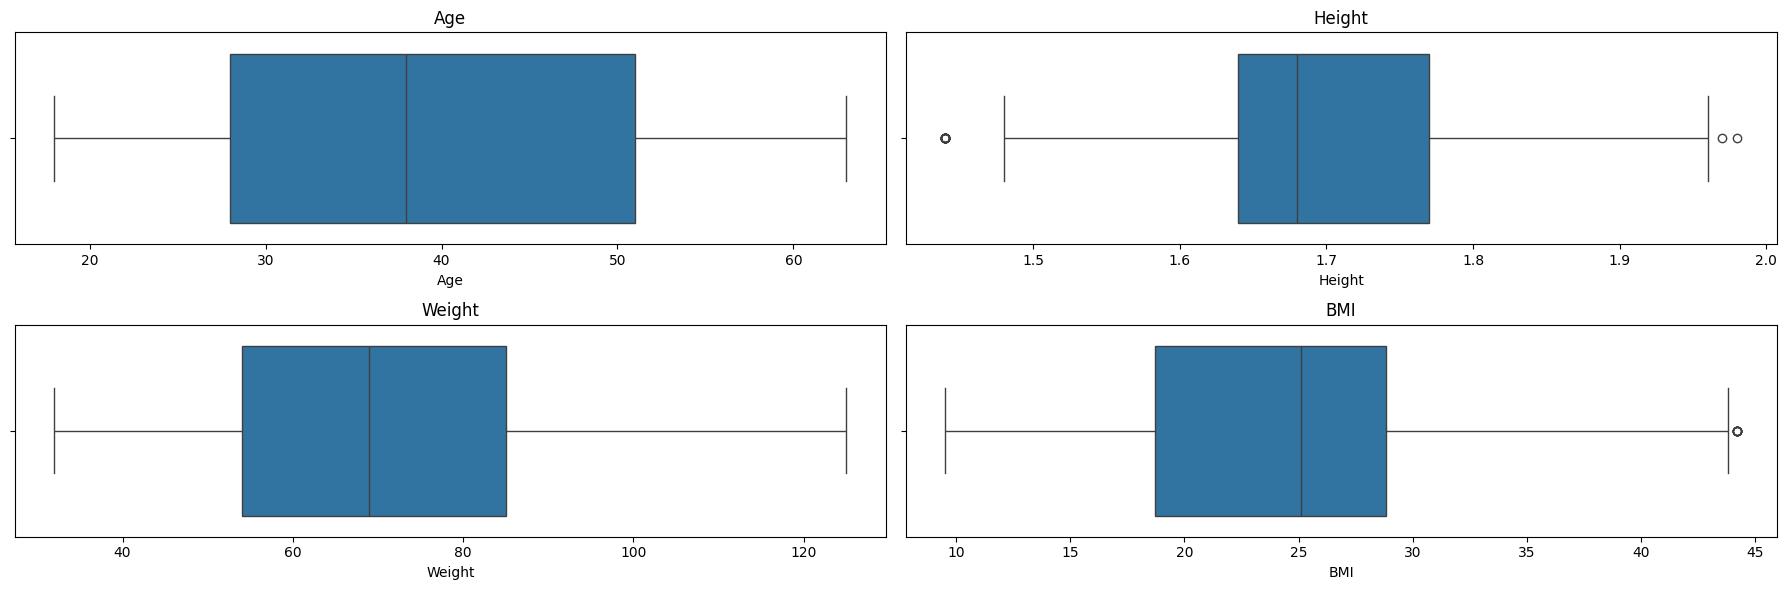

Total Data After Cleaned:  11992


In [287]:
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & 
            (df[col] <= upper_bound)].copy()    

plt.figure(figsize=(18, 3 * n_rows))
for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1) 
    sns.boxplot(x=df[col]) 
    plt.title(col, fontsize=12)

plt.tight_layout() 
plt.show()
print("Total Data After Cleaned: ",len(df))

### **DETECTING AND REMOVE ANOMALIES DATA**

In [288]:
columns = ['Hypertension', 'Diabetes', 'Level', 'Fitness Goal',
           'Fitness Type', 'Exercises', 'Equipment', 'Diet', 'Recommendation']

for col in columns:
    print(f"Anomalies Detection in {col}")
    counts = df[col].value_counts(dropna=False)
    print(counts.to_string(), "\n")

Anomalies Detection in Hypertension
Hypertension
No     6491
Yes    5501 

Anomalies Detection in Diabetes
Diabetes
No     6490
Yes    5502 

Anomalies Detection in Level
Level
Overweight     3351
Normal         3019
Underweight    2888
Obuse          2734 

Anomalies Detection in Fitness Goal
Fitness Goal
Weight Loss    6085
Weight Gain    5907 

Anomalies Detection in Fitness Type
Fitness Type
Cardio Fitness      6085
Muscular Fitness    5907 

Anomalies Detection in Exercises
Exercises
Brisk walking, cycling, swimming, running , or dancing.         3374
Squats, deadlifts, bench presses, and overhead presses          3116
Squats, yoga, deadlifts, bench presses, and overhead presses    2783
Walking, Yoga, Swimming.                                        1360
brisk walking, cycling, swimming, or dancing.                   1359 

Anomalies Detection in Equipment
Equipment
Ellipticals, Indoor Rowers,Treadmills, Rowing machine                                   2704
Dumbbells and barbells 

In [289]:
to_remove = {
    'Equipment': 'Equipment required',
    'Recommendation': 'Conclusion recommendation',
    'Diet': 'Diet'
}
for col, val in to_remove.items():
    df = df[df[col] != val]

for col in columns:
    print(f"Anomalies Detection in {col}")
    counts = df[col].value_counts(dropna=False)
    print(counts.to_string(), "\n")

Anomalies Detection in Hypertension
Hypertension
No     6477
Yes    5488 

Anomalies Detection in Diabetes
Diabetes
No     6476
Yes    5489 

Anomalies Detection in Level
Level
Overweight     3351
Normal         3008
Underweight    2872
Obuse          2734 

Anomalies Detection in Fitness Goal
Fitness Goal
Weight Loss    6085
Weight Gain    5880 

Anomalies Detection in Fitness Type
Fitness Type
Cardio Fitness      6085
Muscular Fitness    5880 

Anomalies Detection in Exercises
Exercises
Brisk walking, cycling, swimming, running , or dancing.         3374
Squats, deadlifts, bench presses, and overhead presses          3102
Squats, yoga, deadlifts, bench presses, and overhead presses    2770
Walking, Yoga, Swimming.                                        1360
brisk walking, cycling, swimming, or dancing.                   1359 

Anomalies Detection in Equipment
Equipment
Ellipticals, Indoor Rowers,Treadmills, Rowing machine                                   2704
Dumbbells and barbells 

### **DATA ENCODING**

In [290]:
level_order = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obuse': 3}
df['Level_encoded'] = df['Level'].map(level_order)

categorical_cols = ['Sex', 'Hypertension', 'Diabetes', 'Fitness Goal', 
                    'Fitness Type', 'Exercises', 'Equipment', 
                    'Diet', 'Recommendation']

label_encoders = {} 
for col in categorical_cols:
    le = LabelEncoder()
    df[col.replace(" ", "_") + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le
    mapping_df = pd.DataFrame({
        'label': le.classes_,
        'encoded': range(len(le.classes_))
    })
    mapping_df.to_csv(f'{ENCODER_PATH}{col.replace(" ", "_")}_encoder.csv', index=False)

df = df.drop(columns=categorical_cols + ['Level'])
df.head()

,Age,Height,Weight,BMI,Level_encoded,Sex_encoded,Hypertension_encoded,Diabetes_encoded,Fitness_Goal_encoded,Fitness_Type_encoded,Exercises_encoded,Equipment_encoded,Diet_encoded,Recommendation_encoded
0,18,1.68,47.5,16.83,0,1,0,0,0,1,1,0,2,5
1,18,1.68,47.5,16.83,0,1,1,0,0,1,1,6,9,4
2,18,1.68,47.5,16.83,0,1,0,1,0,1,2,1,4,2
3,18,1.68,47.5,16.83,0,1,1,1,0,1,2,7,5,0
4,18,1.68,47.5,16.83,0,1,0,0,0,1,1,0,1,5


### **FINDING RELEVANCE AND CORRELATION**

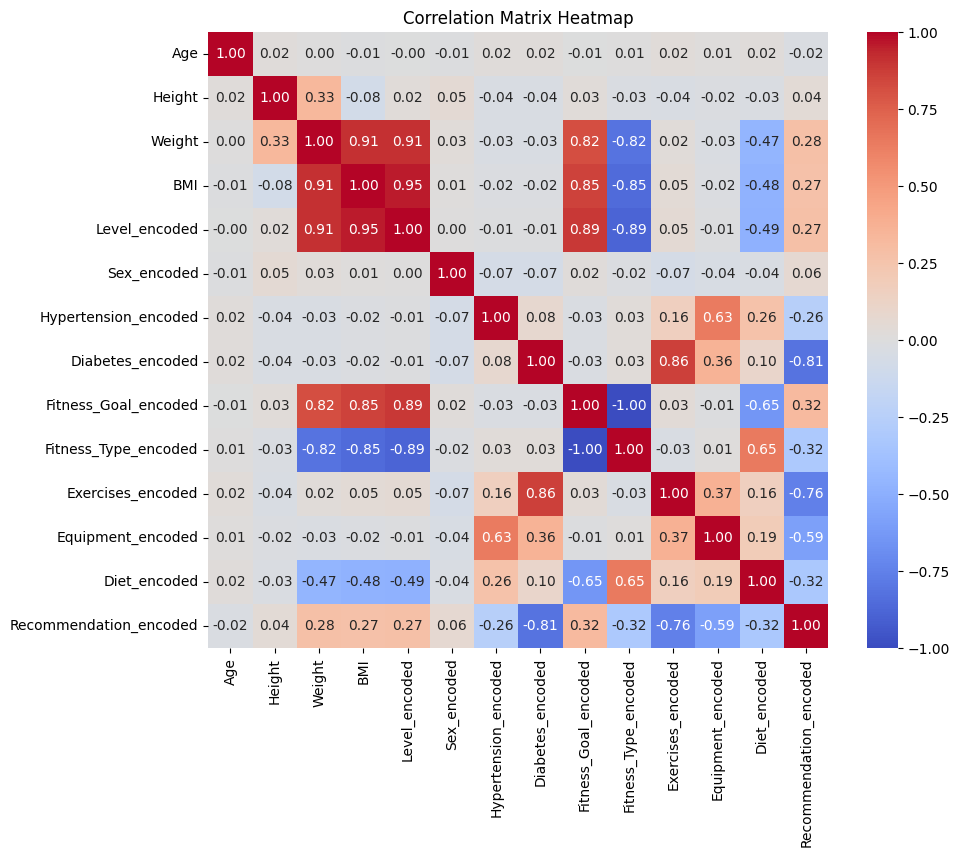

In [291]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### **DROPPING MULTICOLINEARITY**

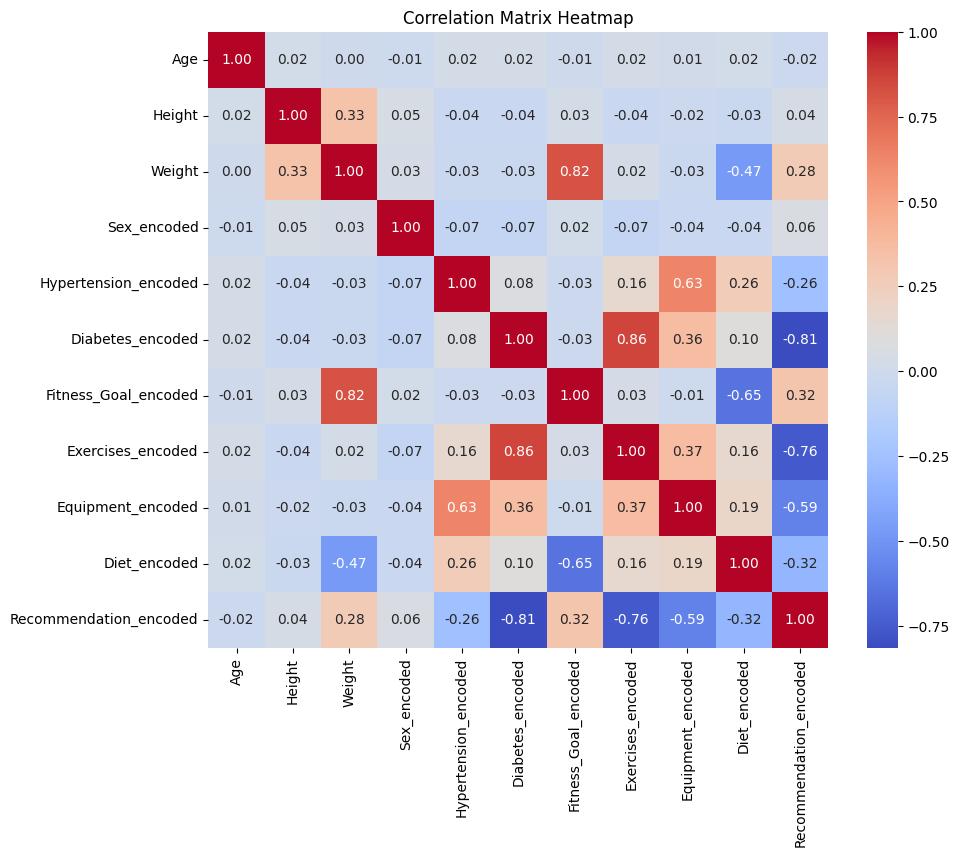

In [292]:
df = df.drop(columns= ['Fitness_Type_encoded', 'BMI', 'Level_encoded'])
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### **HANDLING MISSING DATA**

In [293]:
df.isnull().sum() 

Age                       0
Height                    0
Weight                    0
Sex_encoded               0
Hypertension_encoded      0
Diabetes_encoded          0
Fitness_Goal_encoded      0
Exercises_encoded         0
Equipment_encoded         0
Diet_encoded              0
Recommendation_encoded    0
dtype: int64

### **NORMALIZATION**

In [294]:
df.columns

Index(['Age', 'Height', 'Weight', 'Sex_encoded', 'Hypertension_encoded',
       'Diabetes_encoded', 'Fitness_Goal_encoded', 'Exercises_encoded',
       'Equipment_encoded', 'Diet_encoded', 'Recommendation_encoded'],
      dtype='object')

In [295]:
scaler_features = ['Age', 'Height', 'Weight', 'Sex_encoded',
       'Hypertension_encoded', 'Diabetes_encoded', 'Fitness_Goal_encoded']

joblib.dump(scaler_features, SCALER_PATH + "scaler_features.pkl")

['../data/scaler/scaler_features.pkl']

In [296]:
scaler_features = joblib.load(SCALER_PATH + "scaler_features.pkl")

scaler = MinMaxScaler()
df[scaler_features] = scaler.fit_transform(df[scaler_features])

df.head()
df.to_csv(DATA_PATH + FINAL_DATA, index=False)
joblib.dump(scaler, SCALER_PATH + SCALER)

['../data/scaler/scaler.pkl']

In [297]:
df_ready = pd.read_csv(DATA_PATH + FINAL_DATA)
target_columns = ['Exercises_encoded', 'Equipment_encoded', 
                  'Diet_encoded', 'Recommendation_encoded']

X = df_ready.drop(['Exercises_encoded', 'Equipment_encoded', 
                     'Diet_encoded', 'Recommendation_encoded'], axis=1)
y = df_ready[target_columns]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 8375 samples
Testing set: 3590 samples


In [298]:
df_ready.columns

Index(['Age', 'Height', 'Weight', 'Sex_encoded', 'Hypertension_encoded',
       'Diabetes_encoded', 'Fitness_Goal_encoded', 'Exercises_encoded',
       'Equipment_encoded', 'Diet_encoded', 'Recommendation_encoded'],
      dtype='object')

### **MACHINE LEARNING MODEL**

In [299]:
RANDOM_STATE = 42

In [300]:
base_models = { 
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE),
    "SVC (SVM)": SVC(kernel='rbf', random_state=RANDOM_STATE),
    "Decision Tree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "Naive Bayes": GaussianNB()
}
target_columns = ['Exercises_encoded', 'Equipment_encoded', 
                  'Diet_encoded', 'Recommendation_encoded']

#### **COMPARE F1 SCORE**

In [301]:
scoring = ["f1_weighted"]
results_table = []
print("====================================")
print("      5-Fold Cross Validation")
print("====================================\n")
for col in target_columns:
    print(f"\nTarget: {col}")
    y_train_col = y_train[col]

    for name, model in base_models.items():
        scores = cross_validate(
            model,
            X_train,
            y_train_col,
            cv=5,
            scoring=scoring,
            return_train_score=True,
            n_jobs=-1
        )
        train_f1 = np.mean(scores["train_f1_weighted"])
        test_f1 = np.mean(scores["test_f1_weighted"])
        print(f"  {name:25s} | Train F1: {train_f1:.4f} | Test F1: {test_f1:.4f}")
        results_table.append({
            "target": col,
            "model": name,
            "train_f1": train_f1,
            "test_f1": test_f1
        })

results_df = pd.DataFrame(results_table)

print("\n\n=================================================")
print("RINGKASAN HASIL (Rata-rata Test Score per Model)")
print("=================================================")

summary = results_df.groupby("model")["test_f1"].mean().sort_values(ascending=False)
print(summary)


      5-Fold Cross Validation


Target: Exercises_encoded
  Logistic Regression       | Train F1: 0.9969 | Test F1: 0.9969
  Random Forest             | Train F1: 1.0000 | Test F1: 0.9970
  SVC (SVM)                 | Train F1: 0.9969 | Test F1: 0.9969
  Decision Tree             | Train F1: 1.0000 | Test F1: 0.9984
  Naive Bayes               | Train F1: 0.9969 | Test F1: 0.9969

Target: Equipment_encoded
  Logistic Regression       | Train F1: 0.8999 | Test F1: 0.9002
  Random Forest             | Train F1: 0.9993 | Test F1: 0.9219
  SVC (SVM)                 | Train F1: 0.8977 | Test F1: 0.8965
  Decision Tree             | Train F1: 0.9993 | Test F1: 0.9186
  Naive Bayes               | Train F1: 0.8780 | Test F1: 0.8781

Target: Diet_encoded
  Logistic Regression       | Train F1: 0.9173 | Test F1: 0.9174
  Random Forest             | Train F1: 0.9953 | Test F1: 0.9190
  SVC (SVM)                 | Train F1: 0.9169 | Test F1: 0.9162
  Decision Tree             | Train F1: 0.9953 |

#### **EVALUATION**

#### **SAVE MODEL**

In [302]:
model_name = "Random Forest"
model = base_models[model_name]

for col in target_columns:
    y_train_col = y_train[col]
    model = model
    model.fit(X_train, y_train_col)
    
    filename = f"{col}_{model_name.replace(' ', '_')}.pkl"
    joblib.dump(model, os.path.join(MODELS_PATH, filename))